In [1]:
# train_model.py
"""
This script trains a Convolutional Neural Network (CNN)
on the CIFAR-10 dataset and saves the trained model to a file.
"""

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Load and Explore the CIFAR-10 Dataset ---
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
# -> (50000, 32, 32, 3) means 50,000 images, each 32x32 pixels, with 3 color channels (RGB).
print(f"Training labels shape: {y_train.shape}")
# -> (50000, 1) means 50,000 labels, each a single number (0-9).

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)


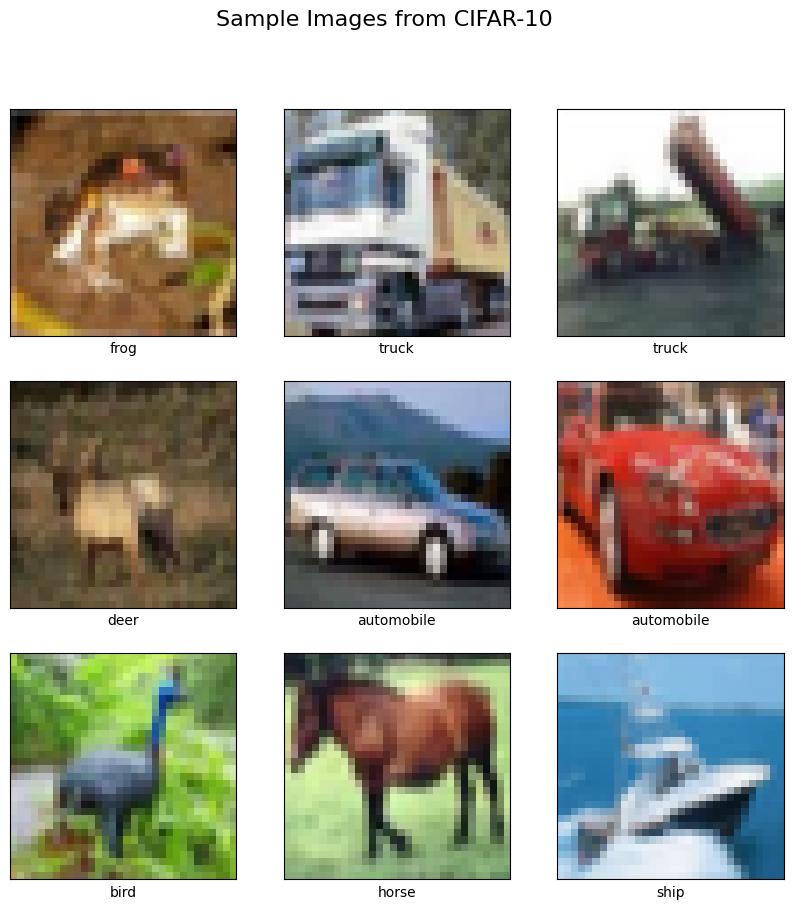

In [2]:
# --- 2. Visualize Sample Images ---
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The y_train labels are arrays, so we need to access the first element
    plt.xlabel(class_names[y_train[i][0]])
plt.suptitle("Sample Images from CIFAR-10", fontsize=16)
plt.show()

In [3]:
# --- 3. Preprocess the Data ---
# Normalize pixel values to be between 0 and 1
print("Normalizing data...")
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
# An epoch is one complete pass through the entire training dataset.
print("One-hot encoding labels...")
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Normalizing data...
One-hot encoding labels...


In [4]:
# --- 4. Build the CNN Architecture ---
print("Building the CNN model...")
model = Sequential([
    Input(shape=(32, 32, 3)),

    # First Convolutional Block
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25), # Dropout for regularization

    # Third Convolutional Block
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Flattening and Dense Layers
    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax') # 10 output classes, softmax for probabilities
])

model.summary()

Building the CNN model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,147,466 (4.38 MB)

 Trainable params: 1,147,466 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# --- 5. Compile and Train the Model ---
print("Compiling the model...")
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Training the model...")
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2) # Use 20% of training data for validation

Compiling the model...
Training the model...
Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3957 - loss: 1.6463 - val_accuracy: 0.4960 - val_loss: 1.3863
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5526 - loss: 1.2434 - val_accuracy: 0.6165 - val_loss: 1.0839
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6148 - loss: 1.0848 - val_accuracy: 0.6565 - val_loss: 0.9804
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6536 - loss: 0.9803 - val_accuracy: 0.6858 - val_loss: 0.9007
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6808 - loss: 0.9055 - val_accuracy: 0.7067 - val_loss: 0.8453
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7038 - loss: 0.8359 - val_accuracy: 0.7225 - val_loss: 0.8080
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7200 - loss: 0.7959 - val_accuracy: 0.7400 - val_loss: 0.7488
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/ste

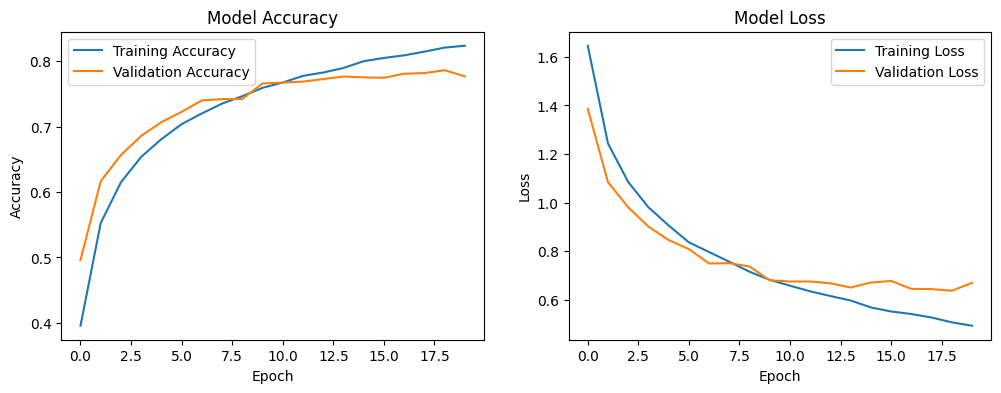

In [6]:
# --- 6. Plot Training History ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluating the model on the test set...
313/313 - 1s - 4ms/step - accuracy: 0.7642 - loss: 0.6955

Test accuracy: 0.7642
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.79      0.77      0.78      1000
  automobile       0.87      0.91      0.89      1000
        bird       0.73      0.62      0.67      1000
         cat       0.63      0.54      0.58      1000
        deer       0.70      0.74      0.72      1000
         dog       0.68      0.67      0.67      1000
        frog       0.72      0.88      0.79      1000
       horse       0.84      0.80      0.82      1000
        ship       0.82      0.90      0.86      1000
       truck       0.86      0.82      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



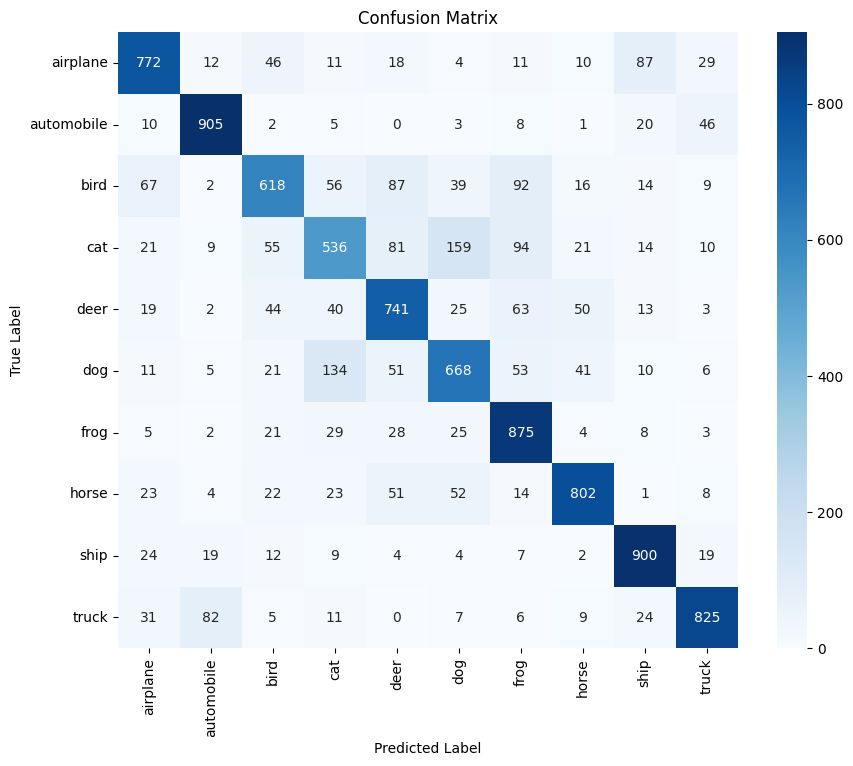

In [7]:
# --- 7. Evaluate on the Test Set ---
print("Evaluating the model on the test set...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Make predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
# --- 8. Save the Initial Trained Model ---
print("Saving the initial model to 'cnn_model.h5'...")
model.save('cnn_model.h5')
print("Initial model saved successfully!")

Saving the initial model to 'cnn_model.h5'...
Initial model saved successfully!


In [11]:
# --- 9. Load and Re-compile the Pre-trained Model ---
from tensorflow.keras.models import load_model

print("Loading the pre-trained model from 'cnn_model.h5'...")
loaded_model = load_model('cnn_model.h5')

# --- FIX: Re-compile the model after loading ---
print("Re-compiling the model...")
loaded_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# You can verify the architecture
print("Model loaded and re-compiled successfully.")
loaded_model.summary()

Loading the pre-trained model from 'cnn_model.h5'...
Re-compiling the model...
Model loaded and re-compiled successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,147,466 (4.38 MB)

 Trainable params: 1,147,466 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# --- 10. Continue Training (Fine-Tuning) ---
print("Continuing the training for 10 more epochs...")

# The training resumes from the last state of the saved model
history_finetune = loaded_model.fit(x_train, y_train,
                                  epochs=10,
                                  batch_size=64,
                                  validation_split=0.2)

Continuing the training for 10 more epochs...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8255 - loss: 0.4948 - val_accuracy: 0.7896 - val_loss: 0.6334
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8310 - loss: 0.4763 - val_accuracy: 0.7895 - val_loss: 0.6269
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8352 - loss: 0.4651 - val_accuracy: 0.7899 - val_loss: 0.6305
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8388 - loss: 0.4493 - val_accuracy: 0.7819 - val_loss: 0.6554
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8447 - loss: 0.4391 - val_accuracy: 0.7899 - val_loss: 0.6452
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8451 - loss: 0.4329 - val_accuracy: 0.7882 - val_loss: 0.6591
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8477 - loss: 0.4265 - val_accuracy: 0.7890 - val_loss: 0.6423
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/st

In [13]:
# --- 11. Evaluate the Fine-Tuned Model ---
print("\nEvaluating the fine-tuned model...")
test_loss_ft, test_acc_ft = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"\nAccuracy after fine-tuning: {test_acc_ft:.4f}")


Evaluating the fine-tuned model...
313/313 - 1s - 4ms/step - accuracy: 0.7813 - loss: 0.6813

Accuracy after fine-tuning: 0.7813


In [14]:
# --- 12. Save the Fine-Tuned Model ---
print("Saving the fine-tuned model to 'cnn_model_finetuned.h5'...")
loaded_model.save('cnn_model_finetuned.h5')
print("Fine-tuned model saved successfully!")

Saving the fine-tuned model to 'cnn_model_finetuned.h5'...
Fine-tuned model saved successfully!
